# Contents
## 1. Importing Libraries and Data
## 2. Data Cleaning
## 3. Hypothesis
## 4. Data Prep for Regression Analysis
## 5. Regression Analysis
## 6. Thoughts on Model Performance

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path= r'C:\Users\spada\OneDrive\Data Analytics\World Happiness Report'

In [4]:
df_combined=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_combined.pkl'))

## 2. Data Cleaning

In [6]:
df_combined.columns

Index(['country/region', 'happiness_rank', 'happiness_score', 'gdp_per_capita',
       'social_support', 'health', 'freedom', 'trust_in_government',
       'generosity', 'year'],
      dtype='object')

In [7]:
df_combined.head()

country/region  happiness_rank  happiness_score  gdp_per_capita  \
year                                                                     
2015 0    Switzerland               1            7.587         1.39651   
     1        Iceland               2            7.561         1.30232   
     2        Denmark               3            7.527         1.32548   
     3         Norway               4            7.522         1.45900   
     4         Canada               5            7.427         1.32629   

        social_support   health  freedom  trust_in_government  generosity  \
year                                                                        
2015 0         1.34951  0.94143  0.66557              0.41978     0.29678   
     1         1.40223  0.94784  0.62877              0.14145     0.43630   
     2         1.36058  0.87464  0.64938              0.48357     0.34139   
     3         1.33095  0.88521  0.66973              0.36503     0.34699   
     4         1.32261  0.90563  0.63297              0.32957     0.45811   

        year  
year          
2015 0  2015  
     1  2015  
     2  2015  
     3  2015  
     4  2015

In [8]:
df_combined.shape

(782, 10)

In [9]:
# Check for missing values

df_combined.isnull().sum()

country/region         0
happiness_rank         0
happiness_score        0
gdp_per_capita         0
social_support         0
health                 0
freedom                0
trust_in_government    0
generosity             0
year                   0
dtype: int64

#### No missing values

In [10]:
dups = df_combined.duplicated()

In [11]:
dups.shape

(782,)

#### No duplicates

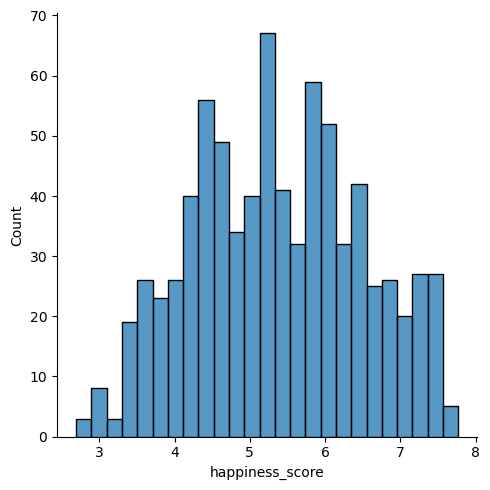

In [14]:
sns.displot(df_combined['happiness_score'], bins=25)

#### No extreme values

In [16]:
#Check the mean
df_combined['happiness_score'].mean()

5.379017902998665

In [17]:
#Check the median
df_combined['happiness_score'].median()

5.322

In [18]:
#Check the max
df_combined['happiness_score'].max()

7.769

## 3. Hypothesis

### "Countries/regions with a higher GDP per capita are generally a more happy population than those with a low or average GDP per capita."

## 4. Data Prep for Regression Analysis

### A few scatterplots to compare variables

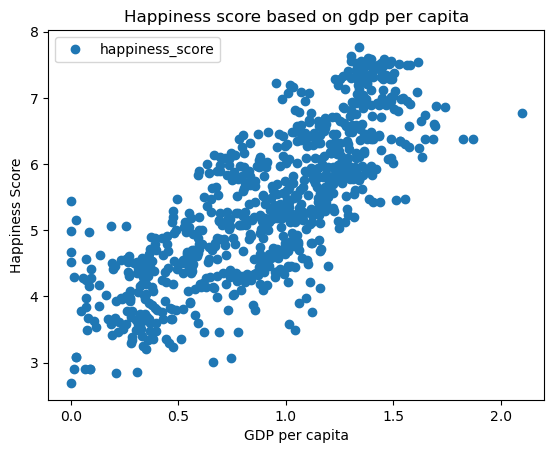

In [19]:
#Scatterplot on happiness_score and gdp_per_capita
df_combined.plot(x = 'gdp_per_capita', y='happiness_score',style='o')
plt.title('Happiness score based on gdp per capita')  
plt.xlabel('GDP per capita')  
plt.ylabel('Happiness Score')  
plt.show()

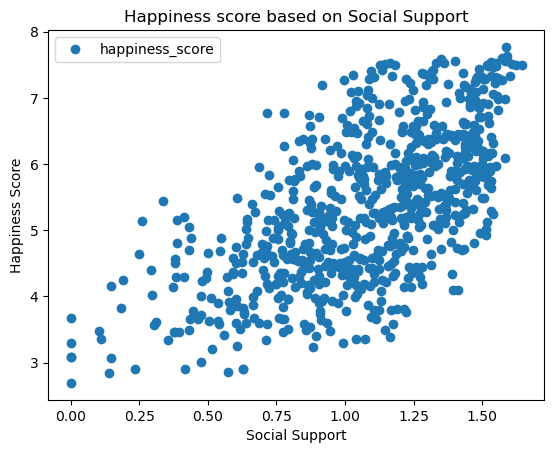

In [20]:
#Scatterplot on happiness_score and social support
df_combined.plot(x = 'social_support', y='happiness_score',style='o')
plt.title('Happiness score based on Social Support')  
plt.xlabel('Social Support')  
plt.ylabel('Happiness Score')  
plt.show()

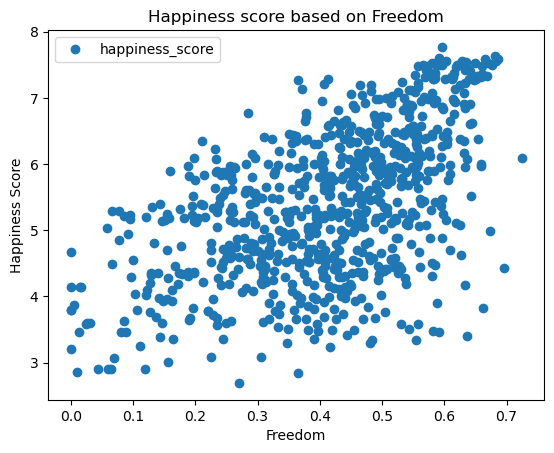

In [25]:
#Scatterplot on happiness_score and freedom
df_combined.plot(x = 'freedom', y='happiness_score',style='o')
plt.title('Happiness score based on Freedom')  
plt.xlabel('Freedom')  
plt.ylabel('Happiness Score')  
plt.show()

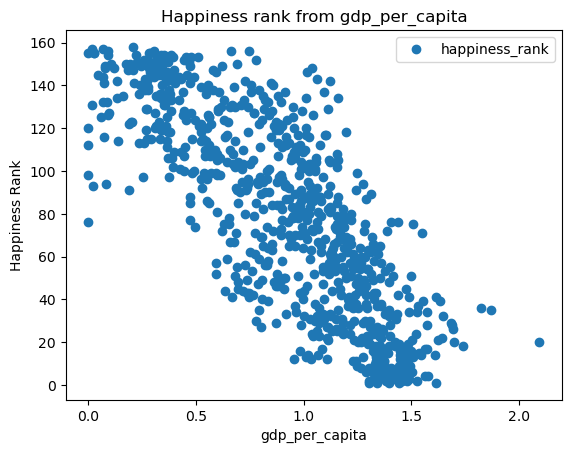

In [27]:
#Scatterplot on happiness_rank and gdp_per_capita
df_combined.plot(x = 'gdp_per_capita', y='happiness_rank',style='o')
plt.title('Happiness rank from gdp_per_capita')  
plt.xlabel('gdp_per_capita')  
plt.ylabel('Happiness Rank')  
plt.show()

#### Happiness Score vs GDP per capita

In [28]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_combined['gdp_per_capita'].values.reshape(-1,1)
y = df_combined['happiness_score'].values.reshape(-1,1)

In [29]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [30]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [31]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 5. Regression Analysis

In [32]:
# Create a regression object.

regression = LinearRegression()

In [33]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

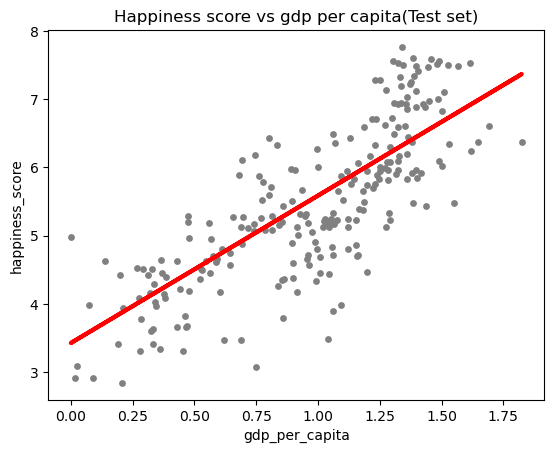

In [35]:
# plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness score vs gdp per capita(Test set)')
plot_test.xlabel('gdp_per_capita')
plot_test.ylabel('happiness_score')
plot_test.show()

#### Notes: According to the plot above, the regression line fits the data decently, but doesn't appear to fit it super closely since there are a lot of points that are both above and below the line throughout the plot.

In [36]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [37]:
#Model summary stats

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.5039507249325367
R2 score:  0.6165274246667813


In [38]:
# Comparison of the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.806091
1,6.886,6.446876
2,6.344,6.733791
3,7.119,6.439326
4,3.781,4.039473
5,4.692,5.925228
6,4.390,4.255378
7,5.061,5.024176
8,6.929,6.506131
9,5.488,5.989301


## 6. Thoughts on Model Performance

### The R2 score of 0.617 indicates that the model used was a good fit for the data since it was fairly close to 1. The positive slope of 2.16 also shows how there is a positive relationship between the two variables. 
### With the data collected in the Gallop World Poll for the World Happiness Report being collected via phone survey and by in person survey, there as a possibility of bias being present due to human bias and human error can be present. 